In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
matches = pd.read_csv("./IPL_Matches_2008_2022.csv")
balls = pd.read_csv("./IPL_Ball_by_Ball_2008_2022.csv")

In [3]:
matches["Date"] = pd.to_datetime(matches["Date"])
matches['City'] = matches['City'].str.replace("Bengaluru", "Bangalore")
matches['City'] = matches['City'].str.strip()

# extracting year from date column
matches["year"] = matches["Date"].dt.year

# replacing "Rising Pune Supergiant" with "Rising Pune Supergiants"
cols = ["Team1","Team2","WinningTeam","TossWinner"]
for col in cols:
    matches[col] = matches[col].str.replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [11]:
batter_list = balls["batter"].unique().tolist()
bowler_list = balls["bowler"].unique().tolist()
player_list = set(batter_list + bowler_list)

# Creating a dataframe with players and their teams

In [85]:
import ast
#matches["Team1Players"] = matches["Team1Players"].apply(lambda x: ast.literal_eval(x))
#matches["Team2Players"] = matches["Team2Players"].apply(lambda x: ast.literal_eval(x))

new_data = []

for index, row in matches.iterrows():
    team_name = row['Team1']
    players_list = row['Team1Players']
    
    for player in players_list:
        if player not in new_data:
            new_data.append({'Player': player, 'Team': team_name})

player_team_df = pd.DataFrame(new_data)
player_team_df.drop_duplicates(inplace=True)

In [88]:
player_team_df[player_team_df["Player"] == "HH Pandya"]["Team"].unique().tolist()

['Gujarat Titans', 'Mumbai Indians']

In [19]:
player_balls = balls[(balls["batter"] == "V Kohli") | (balls["bowler"] == "V Kohli")]

In [41]:
def get_player_stats(player_name):
    total_matches = player_balls["ID"].nunique()
    total_runs = player_balls["total_run"].sum()
    num_fours = player_balls[player_balls["total_run"] == 4].shape[0]
    num_sixes = player_balls[player_balls["total_run"] == 6].shape[0]
    num_balls = player_balls["ballnumber"].count()
    num_dismissals = player_balls["isWicketDelivery"].sum()
    
    # 50s and 100s
    runs_per_match = player_balls.groupby('ID')['batsman_run'].sum().reset_index()
    filt = (runs_per_match['batsman_run'] >= 50) & (runs_per_match['batsman_run'] < 100)
    fifties = runs_per_match[filt].shape[0]
    centuries = runs_per_match[runs_per_match['batsman_run'] >= 100].shape[0]
    
    
    def batting_average(batsman_name):
    
        """This function takes a batsman's name as input and returns their batting average."""
        batsman_df = balls[balls['batter'] == batsman_name]
        total_runs = batsman_df['batsman_run'].sum()
        out_count = batsman_df['isWicketDelivery'].sum()
        return round(total_runs/out_count, 2)
    
    def get_strike_rate(batsman_name):
        batsman_df = balls[balls['batter'] == batsman_name]
        return round((batsman_df['batsman_run'].sum() / batsman_df['ballnumber'].count()) * 100, 2)
    
    batting_avg = batting_average(player_name)
    strike_rate = get_strike_rate(player_name)
    
    player_stats_df = pd.DataFrame()
    player_stats_df["Metric"] = ["Total Matches Played", "Total Balls Played", "Total Runs scored","Strike rate",
                                 "Batting average", "Fours", "Sixes", "Fifties", "Hundreds", "Number of Dismissals"]
    player_stats_df["Value"] = [total_matches, num_balls, total_runs, strike_rate, batting_avg, num_fours, num_sixes, fifties, centuries, 
                                num_dismissals]
    return player_stats_df
    
get_player_stats("V Kohli")

,Metric,Value
0,Total Matches Played,216.00
1,Total Balls Played,5530.00
2,Total Runs scored,7247.00
3,Strike rate,125.98
4,Batting average,34.37
5,Fours,609.00
6,Sixes,229.00
7,Fifties,48.00
8,Hundreds,5.00


# 2. Percentage of total runs of the team contributed by the player

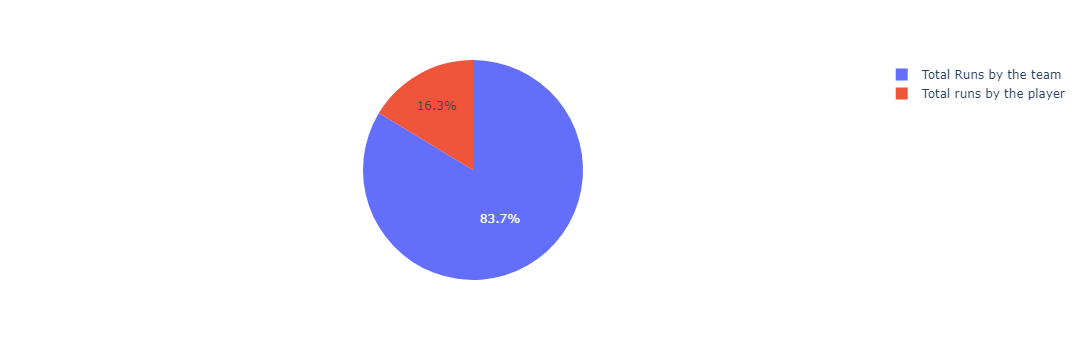

In [48]:
def get_contribution_piechart(player_name):

    player_team = balls[balls["batter"] == player_name]["BattingTeam"].values[0]
    total_team_runs = balls[balls["BattingTeam"] == player_team]["total_run"].sum()
    total_player_runs = balls[balls["batter"] == player_name]["total_run"].sum()

    viz_df = pd.DataFrame()
    viz_df["Metric"] = ["Total Runs by the team", "Total runs by the player"]
    viz_df["Value"] = [total_team_runs, total_player_runs]

    fig = px.pie(data_frame=viz_df, names="Metric", values="Value")
    return fig

get_contribution_piechart("V Kohli")

In [50]:
player_balls["BattingTeam"].unique()

array(['Royal Challengers Bangalore', 'Gujarat Lions',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Deccan Chargers', 'Delhi Daredevils'], dtype=object)

In [54]:
balls[balls["batter"] == "HH Pandya"]["BattingTeam"].unique()

array(['Gujarat Titans', 'Mumbai Indians'], dtype=object)